# Text Classification Using Naive Bayes

##### Importing Useful Module / Package

In [1]:
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

##### This are stop_words in common taken from intenet.

In [17]:
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]


##### #X is a list further made in form of tuple , where first element is name of document and second is the text in documents.

##### #Y is the category'''

In [2]:
# Ma'am Please change the path of dataset as required
X  =[] 
Y = []
for category in os.listdir("F:/GitHub Repo's/IBM-Artificial-Intelligence-and-Machine-Learning-By-IBM-Watson/Final Projects 2 - Text Classification/Datasets"):
    for document in os.listdir("F:/GitHub Repo's/IBM-Artificial-Intelligence-and-Machine-Learning-By-IBM-Watson/Final Projects 2 - Text Classification/Datasets/"+category):
        with open("F:/GitHub Repo's/IBM-Artificial-Intelligence-and-Machine-Learning-By-IBM-Watson/Final Projects 2 - Text Classification/Datasets/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

##### DataType of X and Y in detail

In [3]:
print(type(X))
print(type(Y))

<class 'list'>
<class 'list'>


##### We can see it is a tuple with first element as name of document and second text of document.

In [7]:
print(type(X[0]))
print(X[0])

<class 'tuple'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archi

##### And every particular element in a table is " String "

In [6]:
print(type(X[0][0]))
print(X[0][0])

<class 'str'>
49960


##### splitting the data in training and testing

In [8]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

##### Verifying length of trained variable

In [14]:
print(len(x_train))
print(len(y_test))
print(len(x_train))
print(len(y_test))

14997
5000
14997
5000


##### Example for showing re.split

In [15]:
sample_text="Hey! I am Akash. I am superb. What are you doing there?"
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Akash', 'I', 'am', 'superb', 'What', 'are', 'you', 'doing', 'there', '']


##### Making Dictionary, of words with their corresponding frequency

In [18]:
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1

##### Printing dic,  which have word along with their frequency

In [19]:
print(dic)

{'newsgroups': 15305, 'rec': 4845, 'sport': 1824, 'baseball': 1385, 'path': 15268, 'cantaloupe': 19510, 'srv': 24249, 'cmu': 39352, 'edu': 122683, 'das': 4518, 'news': 25721, 'harvard': 5154, 'noc': 4615, 'near': 5101, 'net': 19129, 'howland': 8283, 'reston': 8249, 'ans': 8347, 'usc': 2180, 'utexas': 3189, 'utnut': 380, 'alchemy': 233, 'chem': 263, 'utoronto': 292, 'mark': 1464, 'subject': 16108, 'look': 2137, 'message': 16498, 'sender': 8289, 'usenet': 6243, 'organization': 14874, 'university': 7373, 'toronto': 1117, 'chemistry': 210, 'department': 1094, 'date': 15603, 'wed': 1203, 'apr': 15393, 'gmt': 13355, 'lines': 15686, 'yes': 1441, 'prefer': 288, 'post': 1592, 'question': 2396, 'read': 2329, 'somewhere': 355, 'long': 2035, 'forgotten': 79, 'article': 10063, 'handsignals': 3, 'used': 3124, 'major': 763, 'league': 588, 'umps': 12, 'originally': 186, 'help': 2491, 'deaf': 29, 'ball': 281, 'player': 553, 'name': 1634, 'dummy': 13, 'urban': 67, 'myth': 67, 'true': 1865, 'gots': 5, 'k

##### Sorting the dictionary on basis of frequency of words and in descending order

In [20]:
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 122683),
 ('cmu', 39352),
 ('com', 37659),
 ('news', 25721),
 ('not', 25173),
 ('srv', 24249),
 ('cantaloupe', 19510),
 ('net', 19129),
 ('message', 16498),
 ('subject', 16108),
 ('lines', 15686),
 ('date', 15603),
 ('apr', 15393),
 ('newsgroups', 15305),
 ('path', 15268),
 ('can', 15078),
 ('organization', 14874),
 ('state', 14093),
 ('gmt', 13355),
 ('ohio', 11920),
 ('one', 11779),
 ('will', 11401),
 ('writes', 11024),
 ('article', 10063),
 ('references', 9707),
 ('comp', 9698),
 ('talk', 9265),
 ('misc', 8979),
 ('ans', 8347),
 ('sender', 8289),
 ('howland', 8283),
 ('reston', 8249),
 ('don', 8070),
 ('people', 7945),
 ('like', 7766),
 ('just', 7524),
 ('university', 7373),
 ('posting', 7348),
 ('nntp', 7017),
 ('know', 6963),
 ('mps', 6928),
 ('host', 6683),
 ('sci', 6539),
 ('get', 6484),
 ('think', 6381),
 ('usenet', 6243),
 ('zaphod', 6242),
 ('may', 6061),
 ('politics', 5978),
 ('alt', 5915),
 ('windows', 5680),
 ('also', 5627),
 ('time', 5312),
 ('rutgers', 5229),
 (

##### Importing Matplotlib Package

In [21]:
import matplotlib.pyplot as plt

##### No. of words vs frequency 

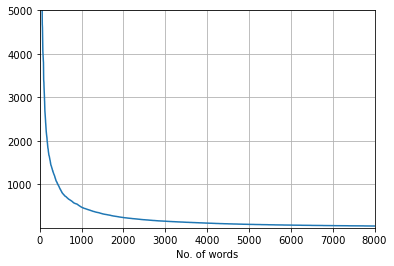

In [28]:
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.xlabel("No. of words")
("frequency")
plt.grid()
plt.show()   